In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
names = [
    "Nearest Neighbours",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Desicion Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [4]:
classifiers = [
    KNeighborsClassifier(8),
    SVC(kernel="linear",C=0.1),
    SVC(gamma=4, C=2),
    GaussianProcessClassifier(1.5*RBF(1.5)),
    DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=25,n_estimators=100,max_features=1),
    MLPClassifier(alpha=2.3,max_iter=10000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

]

In [5]:
#przygotowanie setów danych
X,y = make_classification(
    n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=1
)

In [6]:
rng = np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
lineary_separable = (X,y)

In [7]:
datasets = [
    make_moons(noise=0.3,random_state=0),
    make_circles(noise=0.2, factor=0.5,random_state=1),
    lineary_separable
]

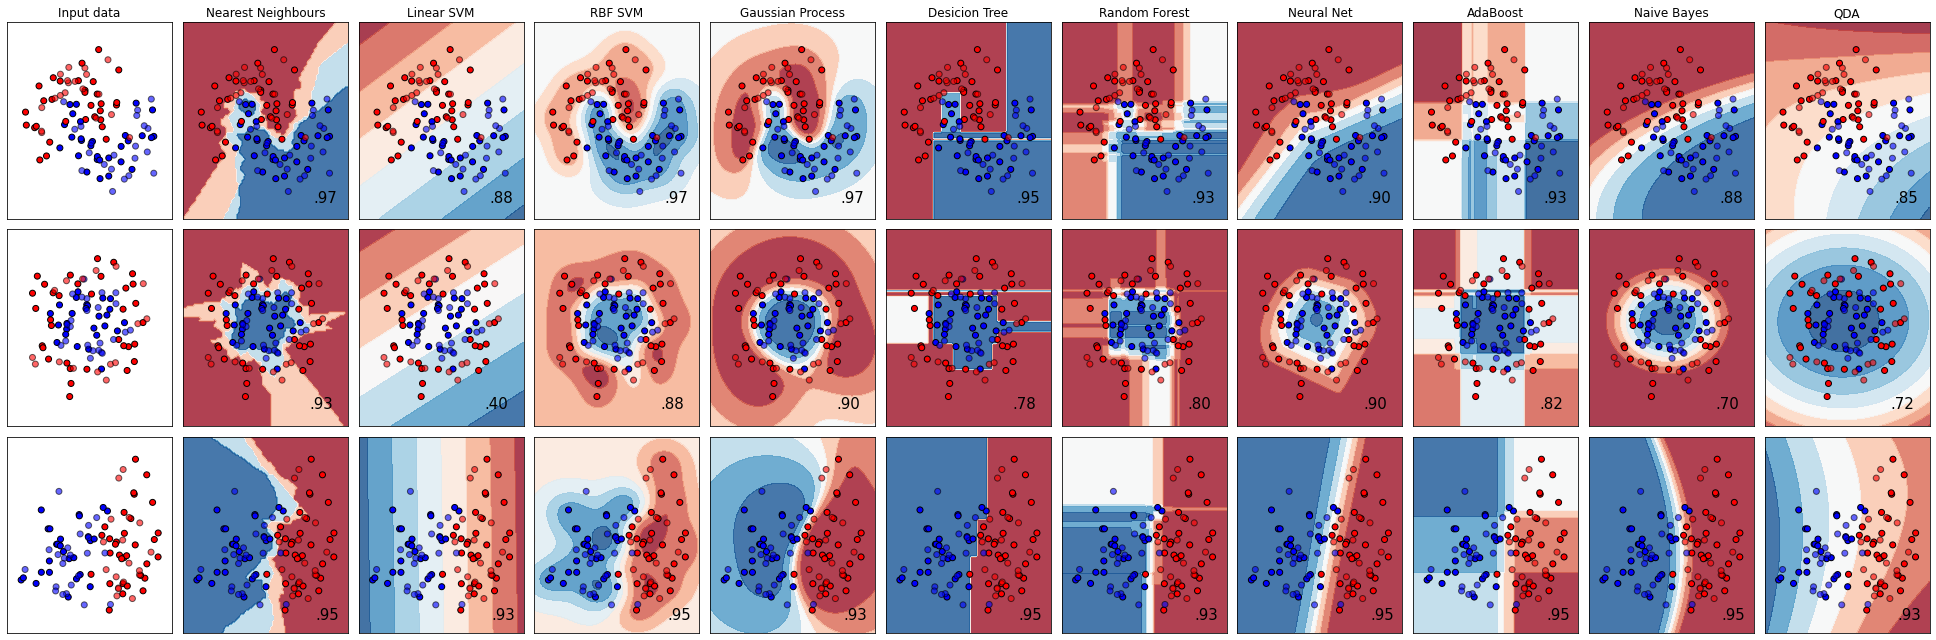

In [8]:
figure=plt.figure(figsize=(27,9))
i=1
for ds_cnt, ds in enumerate(datasets):
    X,y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X,y,test_size=0.4,random_state=42
    )

    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max()+0.5

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#0000FF"])
    ax = plt.subplot(len(datasets),len(classifiers)+1,i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    #wyświwetlanie punktów treningowych
    ax.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap = cm_bright, edgecolors = 'k')
    #wyświwetlanie punktów testowych
    ax.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap = cm_bright, alpha = 0.6, edgecolors = 'k')
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    for name,clf in zip(names,classifiers):
        ax = plt.subplot(len(datasets),len(classifiers)+1,i)

        clf = make_pipeline(StandardScaler(),clf)
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf,X,cmap=cm,alpha=0.8,ax=ax,eps=0.5
        )
        ax.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap = cm_bright, edgecolors = 'k')
        ax.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap = cm_bright, alpha = 0.6, edgecolors = 'k')
        ax.set_xlim(x_min,x_max)
        ax.set_ylim(y_min,y_max)
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" %score).lstrip("0"),
            size=15,
            horizontalalignment = "right",
        )
        i+=1
plt.tight_layout()
plt.show()